In [1]:
from ch_parser import CHFile
from alcdh_integration import ALCDH_Integrate, normalize_baseline, peak_detect
import numpy as np
from scipy import signal


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy import signal
from matplotlib.ticker import FormatStrFormatter
import peakutils
import matplotlib

[0.25099844391626, 1.403331749313753, 2.840331714476782, 3.8886650223955312, 5.165664991437416, 6.318998296810666, 7.350998271792048, 8.704331572316729, 9.818998211960702, 11.854331495951762, 13.024998134238135, 14.47966476563954, 15.600331405138057, 16.93666470607487, 18.14366467681375, 20.76466461327325]


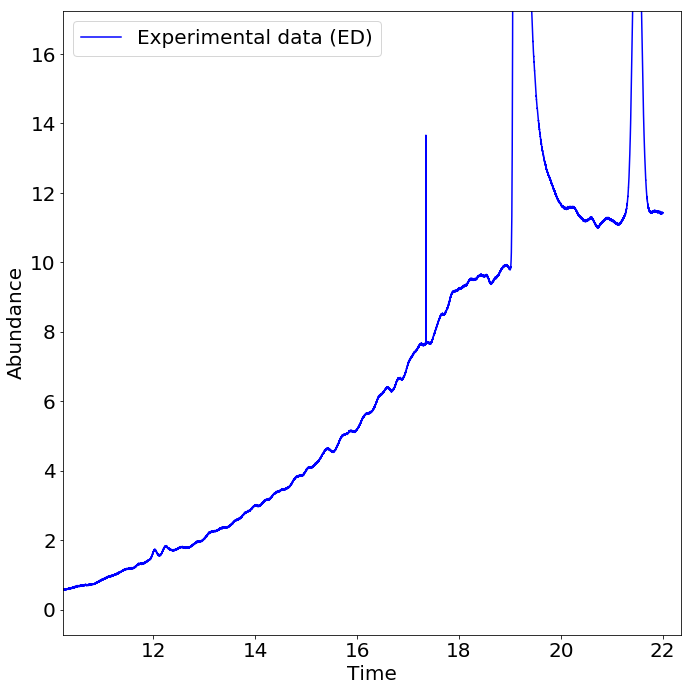

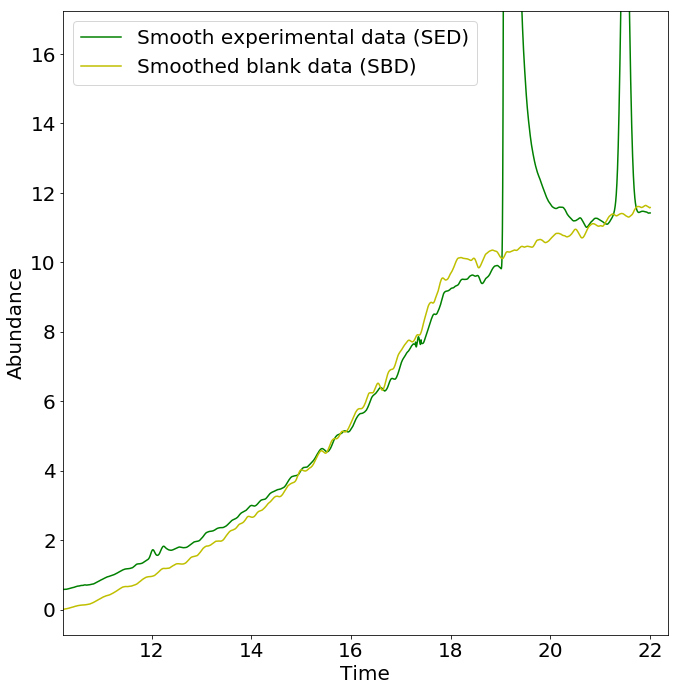

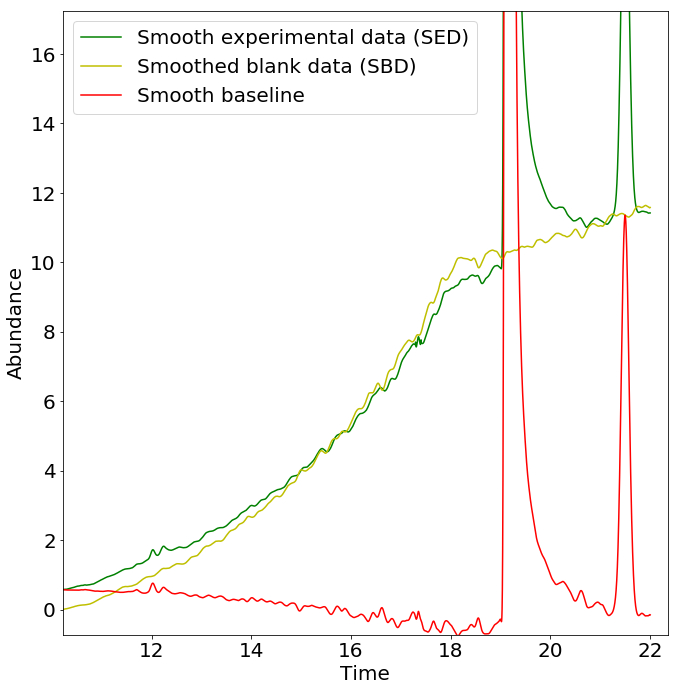

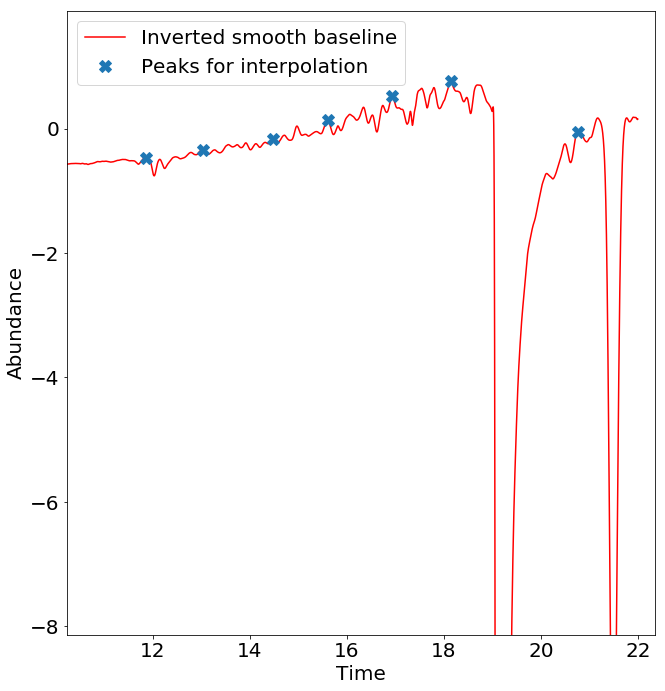

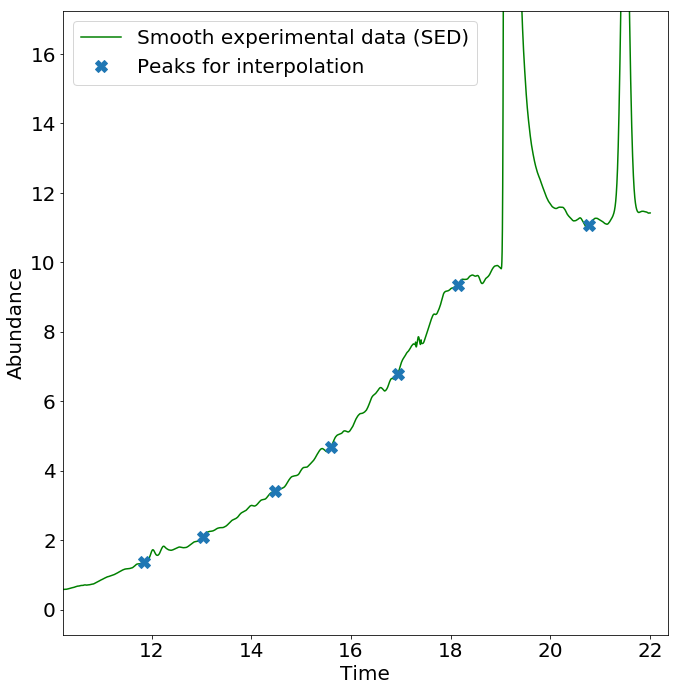

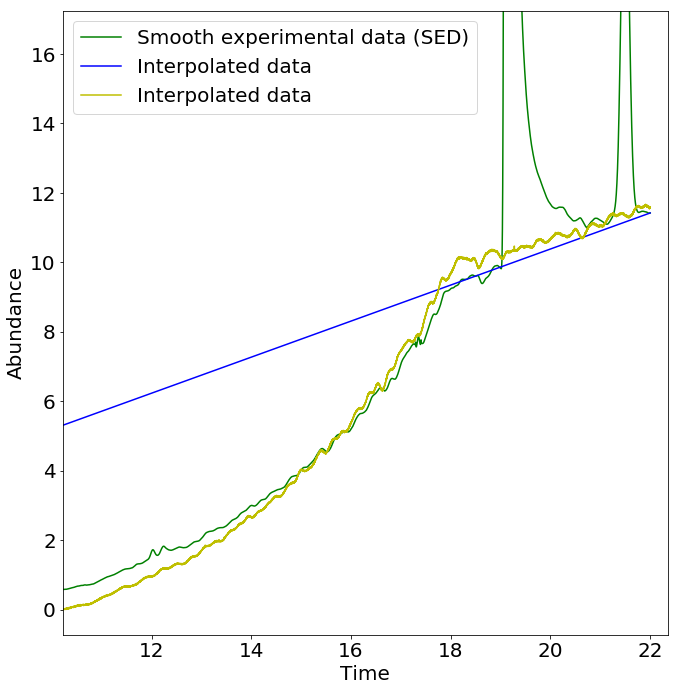

0 753
norm
753 4210
norm
4210 8521
norm
8521 11666
norm
11666 15497
norm
15497 18957
norm
18957 22053
norm
22053 26113
norm
26113 29457
norm
29457 35563
norm
35563 39075
norm
39075 43439
norm
43439 46801
norm
46801 50810
norm
50810 54431
norm
54431 62294
norm
62294 65999
norm


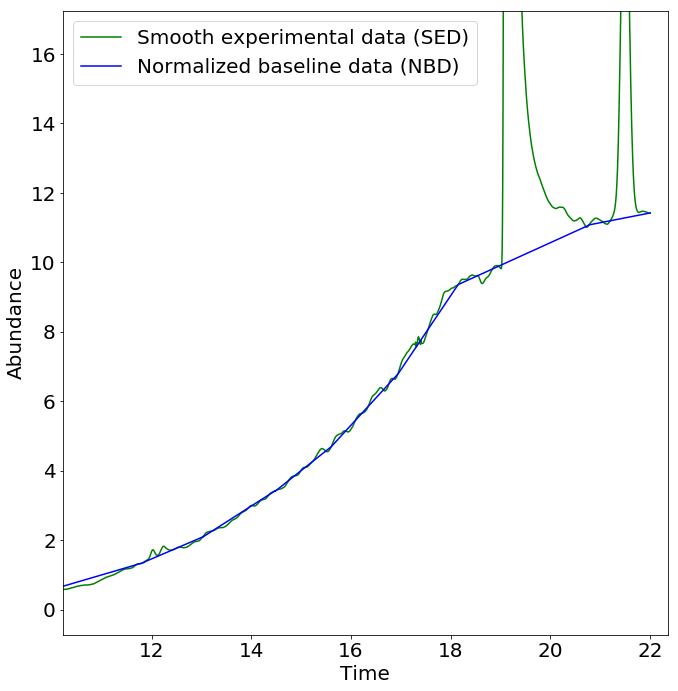

In [18]:

%matplotlib inline
#matplotlib.use('Qt5Agg')

alcdh_settings = {
    'data_y_win_length': 111,
    'blank_y_win_length': 333,
    'savgol_polyorder': 7,
    'peak_min_dist': 20,
    'peak_max_peak': 3,
    'peak_thres_range': (1, 5, .1),
    'norm_thres_range': (20,30),
    'norm_min_dist': 3000, 
    'norm_polyorder': 5,
    'minimum_area': 0.1
}
blank_long_file = CHFile('alcdh_blank_run.ch')

#first_points = np.array(blank_long_6225_fid.values)[:5] - np.array(da.values)[:5]
#avg_fp = np.average(first_points)

base_bx = np.array(blank_long_file.times())
base_by = np.array(blank_long_file.values)


example_data_file = CHFile('/home/zorba/tmp/projmon/alcdh-final/ALCDEH/5_1_19_1BUOH_60SCCM_CBV28014 2019-05-01 14-19-50/NV-F0901.D/FID2B.ch')
s = example_data_file.metadata['yscaling']
ys = example_data_file.metadata['yscaling']
s = 1
base_by = base_by/s
rx = np.array(example_data_file.times())
ry = np.array(example_data_file.values)
ry=ry/s


def normalize_baseline(blank_x, blank_y, data_x, data_y, **kwargs):
    """
    Normalize baseline by smoothing out data & blank run y values
    Then subtracting them
    Then inverting result
    Then finding sparse peaks in that results
    Then removing interpolating between those peaks.

    Parameters:
        blank_x: blank starting index
        blank_y: blank ending index,
        data_x: data y values
        data_y: dat ax values
        kwargs: settings
    """

    x_length = len(data_y) if len(blank_y)>len(data_y) else len(blank_x)

    blank_y_win_length = 333 if 'blank_y_win_length' not in kwargs else kwargs['blank_y_win_length']
    norm_thres_range = (20,30) if 'norm_thres_range' not in kwargs else kwargs['norm_thres_range']
    norm_min_dist = 3000 if 'norm_min_dist' not in kwargs else kwargs['norm_min_dist']
    norm_polyorder = 5 if 'norm_polyorder' not in kwargs else kwargs['norm_polyorder']

    smooth_real_y = np.array(signal.savgol_filter(data_y, window_length=blank_y_win_length, polyorder=norm_polyorder))

    smooth_blank_y = np.array(signal.savgol_filter(blank_y[:x_length], window_length=blank_y_win_length, polyorder=norm_polyorder))

    smooth_combo = np.array(signal.savgol_filter(smooth_real_y - smooth_blank_y, window_length=blank_y_win_length, polyorder=norm_polyorder))


    inv = peak_detect(-1.0 * (smooth_combo), xran=norm_thres_range, min_dist=norm_min_dist)
    inv = np.array([i for i in inv if data_y[i] < data_y[-1]])

    norm_blank_x = np.linspace(data_x[0], data_x[-1], len(data_x))
    norm_blank_y = np.linspace(data_y[0], data_y[-1], len(data_y))
    cur_idx = 0
    inx = [rx[i] for i in inv]
    print(inx)


        
        
        
    fig = plt.figure(figsize=(10, 10))
    font = {'family': 'normal',
                'weight': 'normal',
                'size': 20}

    plt.rc('font', **font)
    plt.plot(rx,ry,'b', label='Experimental data (ED)')
    plt.ylabel('Abundance')
    plt.xlabel('Time')
    plt.axis([10.22, 22.35, -5594.46 * ys, 132497.72 * ys])
    plt.legend(loc='upper left', shadow=False, fontsize='medium')
    fig.tight_layout()
    

    plt.show(block=True)
    
    fig = plt.figure(figsize=(10, 10))
    font = {'family': 'normal',
                'weight': 'normal',
                'size': 20}

    plt.rc('font', **font)
    plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
    plt.plot(rx,smooth_blank_y, 'y', label='Smoothed blank data (SBD)')
    plt.ylabel('Abundance')
    plt.xlabel('Time')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')
    fig.tight_layout()
    plt.axis([10.22, 22.35, -5594.46 * ys, 132497.72 * ys])
    plt.show(block=True)
    
    fig = plt.figure(figsize=(10, 10))
    font = {'family': 'normal',
                'weight': 'normal',
                'size': 20}

    plt.rc('font', **font)
    plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
    plt.plot(rx,smooth_blank_y, 'y', label='Smoothed blank data (SBD)')
    plt.plot(rx,smooth_combo, 'r', label='Smooth baseline')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')

    plt.ylabel('Abundance')
    plt.xlabel('Time')
    fig.tight_layout()
    plt.axis([10.22, 22.35, -5594.46 * ys , 132497.72 * ys])
    plt.show(block=True)
    
    
    inx = [rx[i] for i in inv]
    iny = [-1*smooth_combo[i] for i in inv]
    
    fig = plt.figure(figsize=(10, 10))
    font = {'family': 'normal',
                'weight': 'normal',
                'size': 20}

    plt.rc('font', **font)

    plt.plot(rx,-1*smooth_combo, 'r', label='Inverted smooth baseline')
    plt.plot(inx, iny, 'X', markersize=12,label='Peaks for interpolation')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')

    plt.ylabel('Abundance')
    plt.xlabel('Time')
    fig.tight_layout()
    plt.axis([10.22, 22.35,-62497.72 * ys , 14594.46 * ys])
    plt.show(block=True)
    
    
    inx = [rx[i] for i in inv]
    iny = [ry[i] for i in inv]
    
    
    fig = plt.figure(figsize=(10, 10))

    plt.rc('font', **font)

    plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
    plt.plot(inx, iny, 'X', markersize=12,label='Peaks for interpolation')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')

    plt.ylabel('Abundance')
    plt.xlabel('Time')
    fig.tight_layout()
    plt.axis([10.22, 22.35, -5594.46 * ys, 132497.72 * ys])
    plt.show(block=True)
    
    
    fig = plt.figure(figsize=(10, 10))

    plt.rc('font', **font)
    
    

    plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
    plt.plot(rx,norm_blank_y, 'b', label='Interpolated data')
    plt.plot(rx,blank_y, 'y', label='Interpolated data')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')

    plt.ylabel('Abundance')
    plt.xlabel('Time')
    fig.tight_layout()
    plt.axis([10.22, 22.35, -5594.46 * ys, 132497.72 * ys])
    plt.show(block=True)
    inv = inv.tolist()
    inv += [len(data_y)-1]
    #inv = inv.tolist() + [data_y[-1]]
    cur_idx = 0
    for idx, p in enumerate(inv):
        print(cur_idx, p+1)
        # this calculates the slope between the beginning and end of the inverted peak area
        norm_blank_y[cur_idx:p+1] = np.linspace(data_y[cur_idx], data_y[p], p - cur_idx+1)
        print('norm')

        cur_idx = p +1
    

    fig = plt.figure(figsize=(10, 10))

    plt.rc('font', **font)
    
    

    plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
    plt.plot(rx,norm_blank_y, 'b', label='Normalized baseline data (NBD)')
    #plt.plot(rx,blank_y, 'y', label='Interpolated data')
    plt.legend(loc='upper left', shadow=False, fontsize='medium')

    plt.ylabel('Abundance')
    plt.xlabel('Time')
    fig.tight_layout()
    plt.axis([10.22, 22.35, -5594.46 * ys, 132497.72 * ys])
    plt.show(block=True)
    
    return norm_blank_x, norm_blank_y

blank_x, blank_y = normalize_baseline(base_bx, base_by, rx, ry, **alcdh_settings)



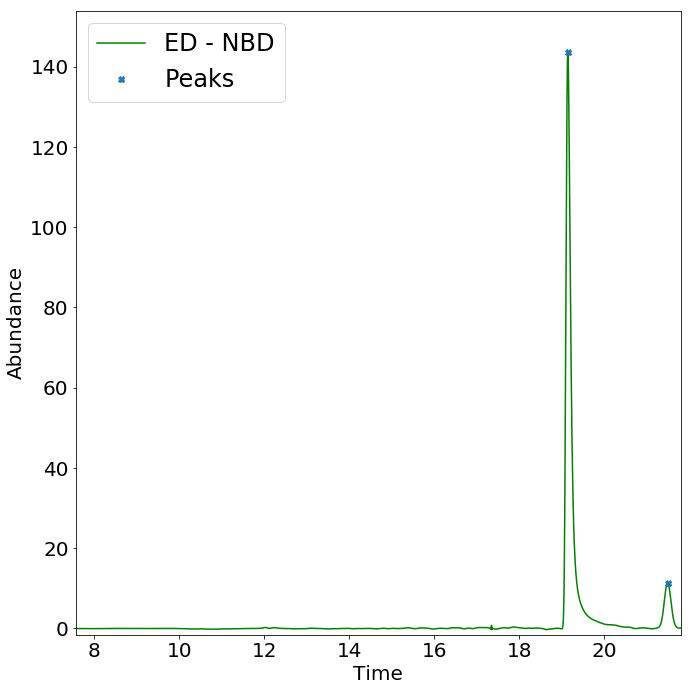

In [8]:
#matplotlib.use('Qt5Agg')
font = {'family': 'normal',
                'weight': 'normal',
                'size': 20}

fig = plt.figure(figsize=(10, 10))

plt.rc('font', **font)

smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
smooth_blank_y = np.array(signal.savgol_filter(blank_y, window_length=333, polyorder=7))
c = smooth_real_y-smooth_blank_y
indexes = peak_detect(c, xran=(.1,8,.1), min_dist=1, max_peak=5)

inx = [rx[i] for i in indexes]
iny = [c[i] for i in indexes]
plt.plot(rx,c, 'g', label='ED - NBD')
plt.plot(inx,iny, 'X', label='Peaks')
plt.legend(loc='upper left', shadow=False, fontsize='large')

plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([7.56, 21.8, -12122 * ys , 1182600 * ys])
plt.show(block=True)

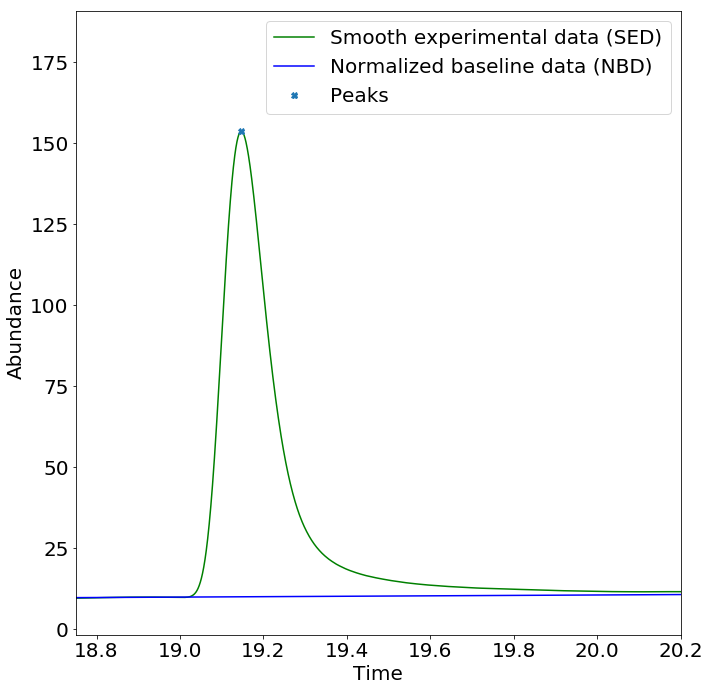

In [9]:
from matplotlib.patches import Polygon

#verts = [(a, start_vert)] + list(zip(ix, iy)) + [(b, end_vert)]
#poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
fig = plt.figure(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
plt.plot(rx,blank_y, 'b', label='Normalized baseline data (NBD)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(inx[:1],iny[:1], 'X', label='Peaks')
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, -1.719/s, 190.908/s])
plt.show(block=True)

In [10]:
def find_area(startx, endx, ny, x, ly=None):
    """
    Find area under curve using trapeszoidal rule.

    Parameters:
        startx: starting index
        endx: ending index,
        ny: y values
        x: x values
        ly: custom trapazoid area (for split peaks)
    """
    if not ly:
        # area of trapazoid below the curve
        ly = (ny[startx] + ny[endx]) / 2.0 * (x[endx] - x[startx])

    # calculate the area, subtract the trapazoid area
    sa = np.trapz(ny[startx:endx + 1], x[startx:endx + 1]) - ly
    return sa

In [11]:
data_y_win_length = 111
savgol_polyorder = 7
minimum_area = 0.1

# min_dist_between_peaks = 20

# minimum distance between peaks
min_dist_between_peaks = 0

# minimum slope of blank line
min_blank_slope = 0

# step interval when walking the y values
xinterval = 10

ny=ry
by=blank_y
areas = []
max_x = rx.size - 1
x=rx

smooth_walking_y = np.array(signal.savgol_filter(ny, window_length=data_y_win_length, polyorder=savgol_polyorder))

for i in indexes:
    # pi is "past index". Keep stepping back while (slope of ny) > (slope of blank polyfit + min_slope
    pi = i

    signal_slope = 1
    blank_slope = 0

    while (signal_slope > blank_slope + min_blank_slope) and pi > 0:
        signal_slope = smooth_walking_y[pi] - smooth_walking_y[pi - xinterval]
        blank_slope = by[pi] - by[pi - xinterval]
        pi -= xinterval

    # fi is "future index". Keep stepping back while (slope of ny) > (slope of blank polyfit + min_slope)
    # OR keep stepping forward if the space between blank y line and real y line is greater than the avg difference
    # between them

    fi = i

    signal_slope = 1
    blank_slope = 0

    while fi + xinterval < max_x and (signal_slope > blank_slope + min_blank_slope):
        signal_slope = smooth_walking_y[fi] - smooth_walking_y[fi + xinterval]
        blank_slope = by[fi] - by[fi + xinterval]
        fi += xinterval

    if pi > 0 and pi < max_x and fi < max_x:

        test_slope = (ny[fi] - ny[pi]) / (x[fi] - x[pi])
        ppi = i
        while ppi > pi and ny[ppi] > test_slope * x[ppi - pi] + ny[pi]:
            ppi -= 1
        pi = ppi
        ffi = i
        while ffi < fi and ny[ffi] > test_slope * x[ffi - pi] + ny[pi]:
            ffi += 1
        fi = ffi


        # if we already have some areas, we need to compare min distance and other sanity checks
        if len(areas):
            # check to make sure the distance between the current past index and future index are greater than the
            # most recent peak. They should have a min. distance of 20

            sa = find_area(pi, fi, ny, x)

            prev_start = areas[-1][0]['x']
            prev_end = areas[-1][1]['x']

            # print('AREA', sa, i, pi, fi)
            if pi - prev_start > min_dist_between_peaks and prev_end > min_dist_between_peaks and pi > prev_end:
                if sa > minimum_area:
                    areas.append(({'x': pi, 'multi': False, 'sly': None}, {'x': fi, 'multi': False, 'sly': None}))


        # first peak is free
        elif not len(areas):
            sa = find_area(pi, fi, ny, x)
            # if the area is greater than the minimum add the new peak.
            if sa > minimum_area and fi - pi > min_dist_between_peaks:
                areas.append(({'x': pi, 'multi': False, 'sly': None}, {'x': fi, 'multi': False, 'sly': None}))
areas


[({'x': 57036, 'multi': False, 'sly': None},
  {'x': 60149, 'multi': False, 'sly': None}),
 ({'x': 63484, 'multi': False, 'sly': None},
  {'x': 65246, 'multi': False, 'sly': None})]

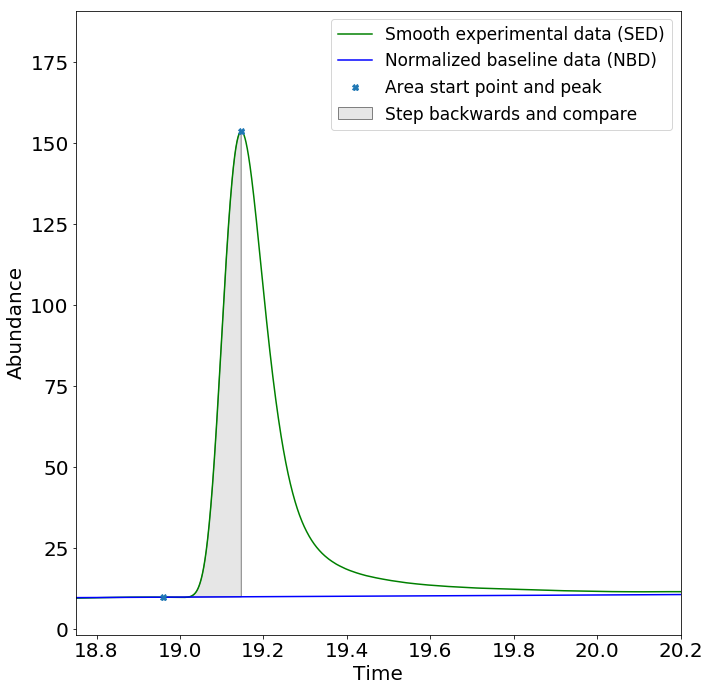

In [12]:
from matplotlib.patches import Polygon
startx=56877
endx=indexes[0]
verts = [(rx[56877], ry[56877])] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], blank_y[endx])]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label='Step backwards and compare')
mx = [rx[startx]] +inx[:1]
my = [ry[startx]] +iny[:1]
fig,ax = plt.subplots(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
plt.plot(rx,blank_y, 'b', label='Normalized baseline data (NBD)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(mx,my, 'X', label='Area start point and peak')
ax.add_patch(poly)
plt.legend(loc='upper right', shadow=False, fontsize='17')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, -1.719/s, 190.908/s])
plt.show()

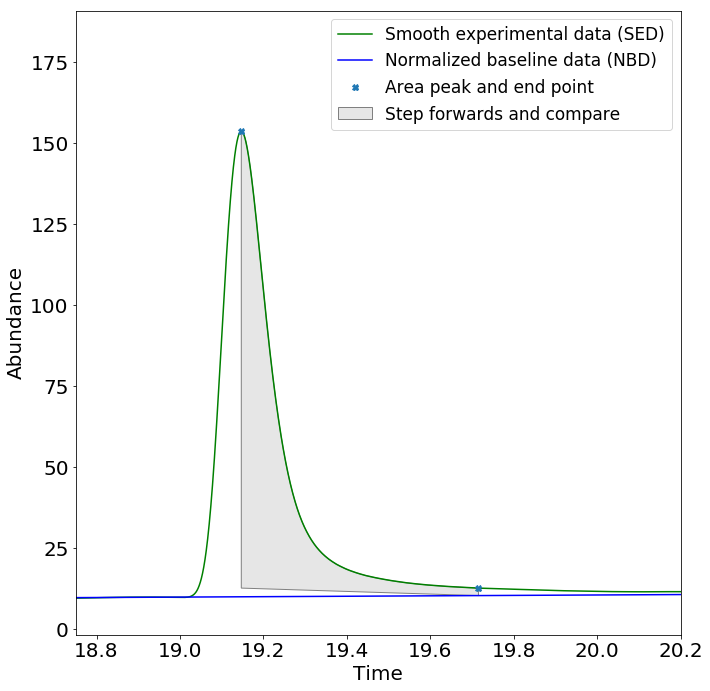

In [13]:
from matplotlib.patches import Polygon
startx=indexes[0]
endx=59146
verts = [(rx[startx], ry[endx])] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], blank_y[endx])]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label='Step forwards and compare')
mx = inx[:1] + [rx[endx]]
my = iny[:1] + [ry[endx]]
fig,ax = plt.subplots(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
plt.plot(rx,blank_y, 'b', label='Normalized baseline data (NBD)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(mx,my, 'X', label='Area peak and end point')
ax.add_patch(poly)
plt.legend(loc='upper right', shadow=False, fontsize='17')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, -1.719/s, 190.908/s])
plt.show()

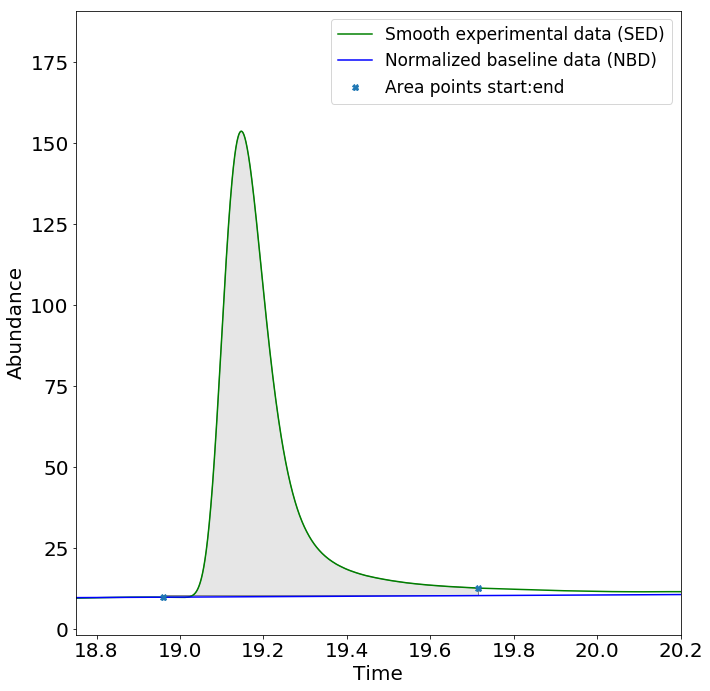

In [14]:
from matplotlib.patches import Polygon
startx=56877
endx=59146
verts = [(rx[startx], blank_y[endx])] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], blank_y[endx])]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
mx = [rx[startx]]  + [rx[endx]]
my = [ry[startx]]  + [ry[endx]]
fig,ax = plt.subplots(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,smooth_real_y, 'g', label='Smooth experimental data (SED)')
plt.plot(rx,blank_y, 'b', label='Normalized baseline data (NBD)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(mx,my, 'X', label='Area points start:end')
ax.add_patch(poly)
plt.legend(loc='upper right', shadow=False, fontsize='17')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, -1.719/s, 190.908/s])
plt.show()

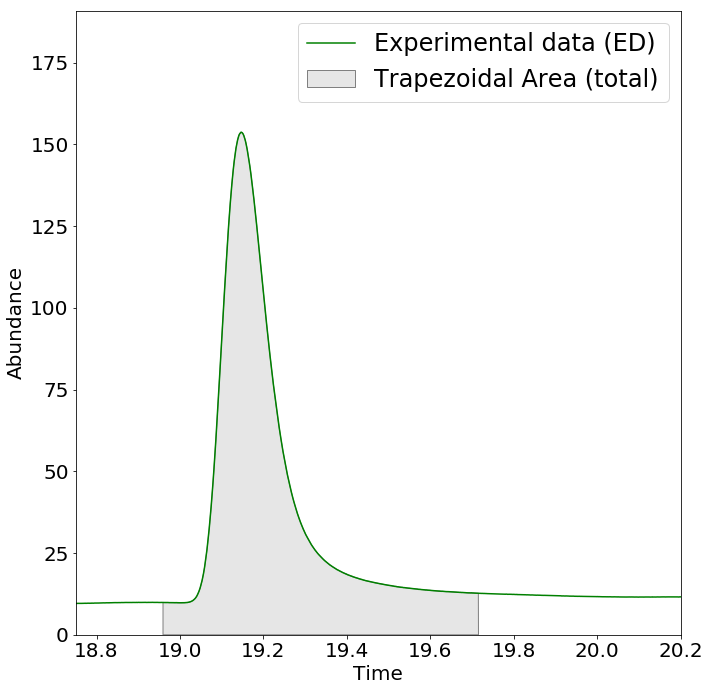

In [15]:
from matplotlib.patches import Polygon
startx=56877
endx=59146
verts = [(rx[startx], 0)] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label='Trapezoidal Area (total)')
mx = [rx[startx]] +[rx[endx]]
my = [ry[startx]] + [ry[endx]]
fig,ax = plt.subplots(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,ry, 'g', label='Experimental data (ED)')
iny = [smooth_real_y[i] for i in indexes]
#plt.plot(mx,my, 'b', label='Filtered data')
ax.add_patch(poly)
plt.legend(loc='upper right', shadow=False, fontsize='large')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, 0/s, 190.908/s])
plt.show()

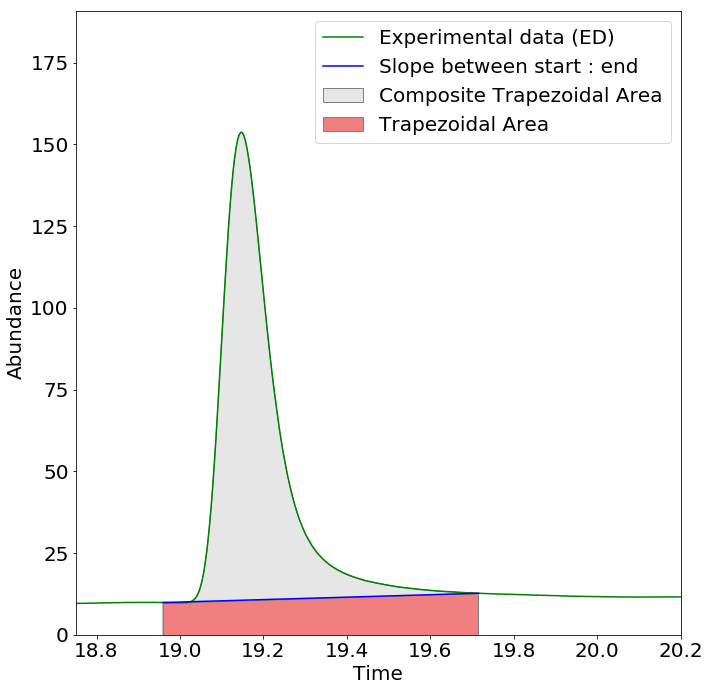

In [16]:
from matplotlib.patches import Polygon
startx=56877
endx=59146
verts = [(rx[startx], 0)] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label='Composite Trapezoidal Area')
vertss = [(rx[startx], ry[startx])] + [(rx[startx], 0)]+[(rx[endx], 0)] + [(rx[endx], ry[endx])]
polyss = Polygon(vertss, facecolor='lightcoral', edgecolor='0.5', label='Trapezoidal Area')
mx = [rx[startx]] +[rx[endx]]
my = [ry[startx]] + [ry[endx]]
fig,ax = plt.subplots(figsize=(10, 10))
plt.rc('font', **font)
plt.plot(rx,ry, 'g', label='Experimental data (ED)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(mx,my, 'b', label='Slope between start : end')
ax.add_patch(poly)
ax.add_patch(polyss)
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, 0/s, 190.908/s])
plt.show()


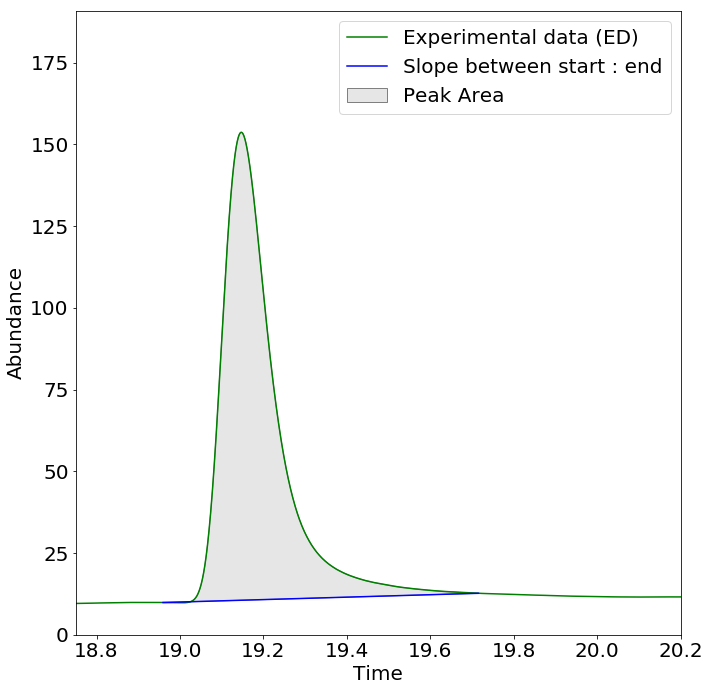

In [17]:
from matplotlib.patches import Polygon
startx=56877
endx=59146
verts = [(rx[startx], ry[startx])] + list(zip(rx[startx:endx],ry[startx:endx])) + [(rx[endx], ry[endx])]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5', label='Peak Area')
mx = [rx[startx]] +[rx[endx]]
my = [ry[startx]] + [ry[endx]]
fig,ax = plt.subplots(figsize=(10, 10))
smooth_real_y = np.array(signal.savgol_filter(ry, window_length=111, polyorder=7))
plt.rc('font', **font)
plt.plot(rx,smooth_real_y, 'g', label='Experimental data (ED)')
iny = [smooth_real_y[i] for i in indexes]
plt.plot(mx,my, 'b', label='Slope between start : end')
ax.add_patch(poly)
plt.legend(loc='upper right', shadow=False, fontsize='medium')
plt.ylabel('Abundance')
plt.xlabel('Time')
fig.tight_layout()
plt.axis([18.75, 20.2, 0/s, 190.908/s])
plt.show()